# Unsupervised Learning | Clustering (K-Means) | Assignment

## Customer / Marketing Segmentation [Clustering (K-Means)]

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Loading & Inspecting Data

In [4]:
# Load the data & check what's inside
mrkt = pd.read_csv ('marketing-segmentation.csv')
mrkt.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [6]:
mrkt

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


In [8]:
mrkt.isna()

,Satisfaction,Loyalty
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [12]:
mrkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Satisfaction  30 non-null     int64  
 1   Loyalty       30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


### Exploring Data

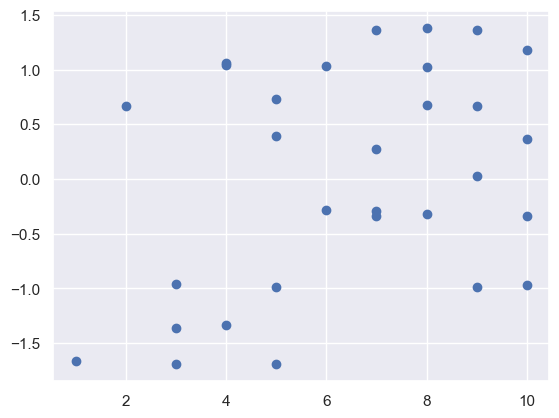

In [18]:
plt.scatter( mrkt['Satisfaction'] , mrkt['Loyalty'])

### Data Preprocessing

In [24]:
mrkt.dropna
#as nothing change in the data and the number of rows is the same so the data is clean already 

<bound method DataFrame.dropna of     Satisfaction  Loyalty
0              4    -1.33
1              6    -0.28
2              5    -0.99
3              7    -0.29
4              4     1.06
5              1    -1.66
6             10    -0.97
7              8    -0.32
8              8     1.02
9              8     0.68
10            10    -0.34
11             5     0.39
12             5    -1.69
13             2     0.67
14             7     0.27
15             9     1.36
16             8     1.38
17             7     1.36
18             7    -0.34
19             9     0.67
20            10     1.18
21             3    -1.69
22             4     1.04
23             3    -0.96
24             6     1.03
25             9    -0.99
26            10     0.37
27             9     0.03
28             3    -1.36
29             5     0.73>

### Model Training & Prediction

In [26]:
from sklearn.cluster import KMeans

In [30]:
kmeans = KMeans(n_clusters = 3 , init = 'k-means++', random_state = 42)

In [36]:
kmeans.fit(mrkt)

C:\Users\rubaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [44]:
c_kmeans = kmeans.fit_predict(mrkt)
c_kmeans

C:\Users\rubaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0])

In [46]:
kmeans.cluster_centers_

array([[ 5.66666667,  0.19083333],
       [ 9.        ,  0.33916667],
       [ 2.66666667, -1.055     ]])

Text(0, 0.5, 'Loyalty')

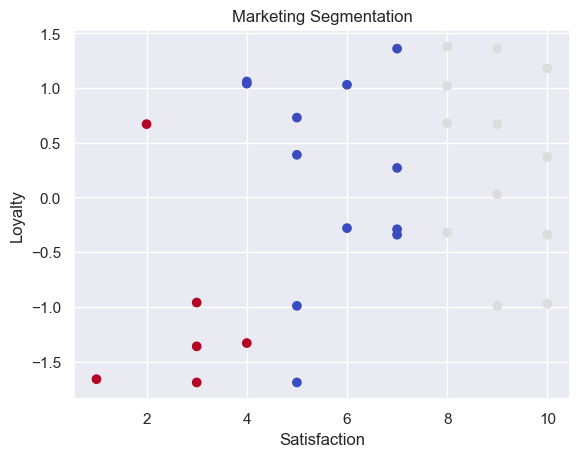

In [56]:
plt.scatter( mrkt['Satisfaction'] , mrkt['Loyalty'] , c = c_kmeans , cmap = 'coolwarm')
plt.title('Marketing Segmentation')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [58]:
mrkt_ = mrkt.copy()
mrkt_['targer'] = c_kmeans
mrkt_

,Satisfaction,Loyalty,targer
0,4,-1.33,2
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,0
4,4,1.06,0
5,1,-1.66,2
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


### Finding the Optimal Number of Clusters (Elbow / Knee Method)

C:\Users\rubaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rubaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rubaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rubaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'wscc')

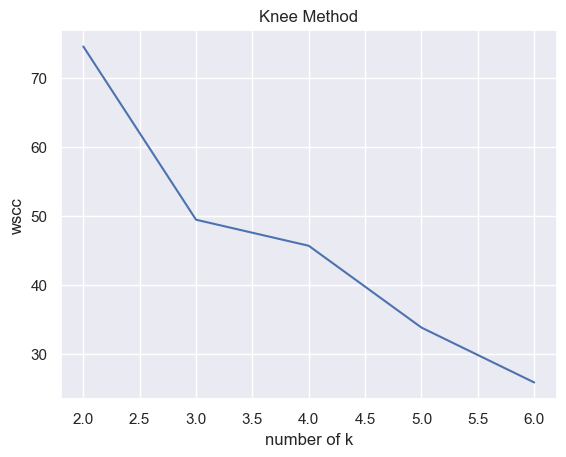

In [68]:
wcss = []
for i in range (2,7):
    kmeans = KMeans(n_clusters = i , init = 'k-means++',random_state = 42)
    kmeans.fit(mrkt)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,7),wcss)
plt.title( 'Knee Method')
plt.xlabel('number of k')
plt.ylabel('wscc')

In [70]:
kmeans = KMeans(n_clusters = 5 , init='k-means++',random_state = 42)

In [72]:
kmeans.fit(mrkt)

C:\Users\rubaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

Text(0, 0.5, 'Loyalty')

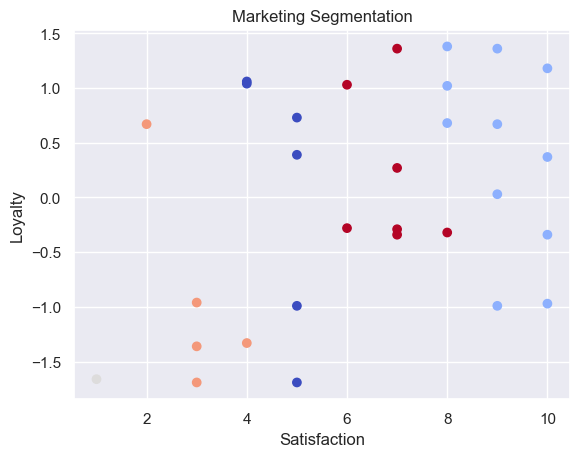

In [74]:
plt.scatter( mrkt['Satisfaction'] , mrkt['Loyalty'] , c = kmeans.labels_ , cmap = 'coolwarm')
plt.title('Marketing Segmentation')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [ ]:
#as we see here 3 is better than 5 so the cor

==========

# GOOD LUCK!